<a href="https://colab.research.google.com/github/learn-programmers/programmers_kdt_II/blob/main/(KDT)_%EC%88%AB%EC%9E%90%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 256
x_test = x_test.astype('float32') / 256

print(x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)

In [ ]:
autoencoder = Model(input_layer, decoded)

In [ ]:
encoder = Model(input_layer, encoded)

In [ ]:
input_layer_decoder = Input(shape=(64,))
decoder_layer = autoencoder.layers[-1](input_layer_decoder)
decoder = Model(input_layer_decoder,decoder_layer)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.3471 - val_loss: 0.1650
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1553 - val_loss: 0.1285
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1241 - val_loss: 0.1099
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1077 - val_loss: 0.0988
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0979 - val_loss: 0.0916
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0911 - val_loss: 0.0865
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0865 - val_loss: 0.0831
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0833 - val_loss: 0.0807
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0811 - val_loss: 0.0790
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0794 - val_lo

In [ ]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

In [ ]:
def visualize(data, size):
    n = 8
    plt.figure(figsize=(20,4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(data[i].reshape(size,size))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

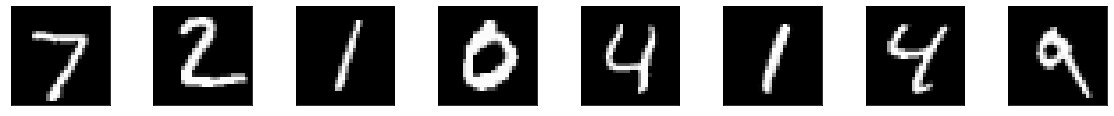

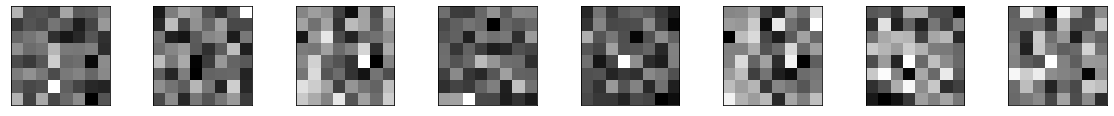

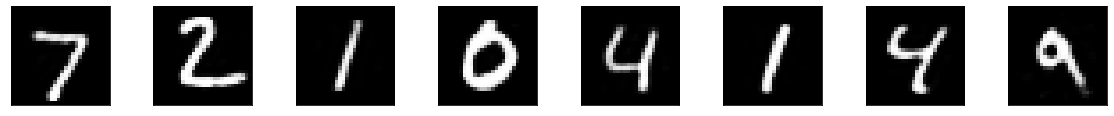

In [ ]:
visualize(x_test, 28)
visualize(encoded_images, 8)
visualize(decoded_images, 28)